<a href="https://colab.research.google.com/github/PuroshotamSingh/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Puroshotam_Singh_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone and its selling price.**
---
###**Dataset Information**
* Number of instances: 2000
* Number of attributes: 21
---
###**Features information:**
###The dataset contains features like:

1. **Battery_power** - Total energy a battery can store in one time measured in mAh

2. **Blue** - Has bluetooth or not

3. **Clock_speed** - speed at which microprocessor executes instructions

4. **Dual_sim** - Has dual sim support or not

5. **Fc** - Front Camera mega pixels

6. **Four_g** - Has 4G or not

7. **Int_memory** - Internal Memory in Gigabytes

8. **M_dep** - Mobile Depth in cm

9. **Mobile_wt** - Weight of mobile phone

10. **N_cores** - Number of cores of processor

11. **Pc** - Primary Camera mega pixels

12. **Px_height** - Pixel Resolution Height

13. **Px_width** - Pixel Resolution Width

14. **Ram** - Random Access Memory in Mega Bytes

15. **Sc_h** - Screen Height of mobile in cm

16. **Sc_w** - Screen Width of mobile in cm

17. **Talk_time** - longest time that a single battery charge will last when you are on call

18. **Three_g** - Has 3G or not

19. **Touch_screen** - Has touch screen or not

20. **Wifi** - Has wifi or not
---
###**Target Variable :**
* **'Price_range'**: This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the price range of mobile phones.**

# **Importing libraries**

In [85]:
# Importing libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To supress the warnings

import warnings
warnings.filterwarnings('ignore')

# **Dataset initialization**

In [86]:
# Loading dataset and creating dataframe

df = pd.read_csv('/content/drive/MyDrive/Copy of data_mobile_price_range.csv')

In [87]:
# Printing first 10 rows of our dataset

df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [88]:
# Shape of dataset

df.shape

(2000, 21)

* **Number of instances: 2000**
* **Number of attributes: 21**

In [89]:
# Let's see how many data types we have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**There are only two data types, float and integers.**

In [90]:
# Let's look at the statistical discription of all features

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**The dataset contains:**
* **Dichotomous type variables such as bluetooth, wifi, 3g, 4g, dual_sim and touch screen.** 
* **Nominal type variables such as n_cores and m_deep.**

# **EDA on features**

## **price_range**

In [91]:
# checking the unique categories of dependent variable

df['price_range'].unique()

array([1, 2, 3, 0])

* **0** is for low price

* **1** is for medium price 

* **2** is for high price and

* **3** is for very high price

In [92]:
# Value counts of each of categories of price_range.

df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1.0, 'Count of price range')

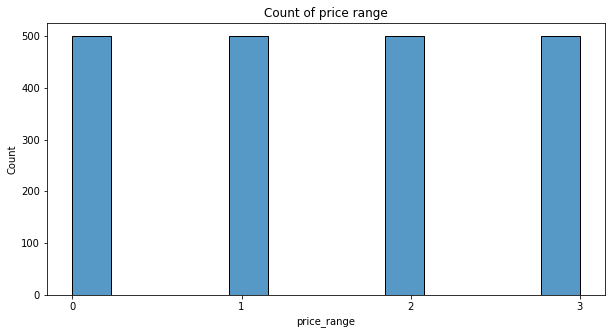

In [93]:
# Histplot to show the count of all categories

plt.figure(figsize=(10,5))
xtick=[0,1,2,3]
sns.histplot(data=df['price_range'])
plt.xticks(xtick)
plt.title('Count of price range')

**There are equal no. of observations for each price range.**

## **n_cores**

In [94]:
# Checking unique categories

sorted(list(df['n_cores'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8]

In [95]:
# Value counts of each of categories.

df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
5    246
3    246
1    242
6    230
Name: n_cores, dtype: int64

Text(0.5, 1.0, 'Count of each cores of processor')

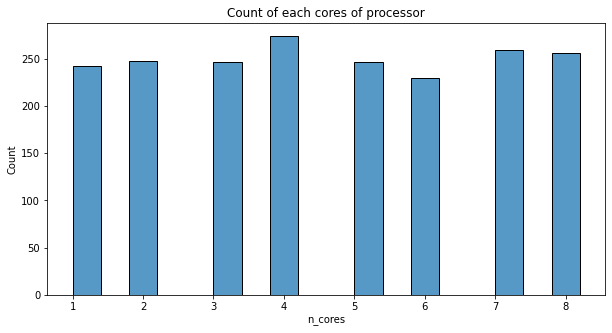

In [96]:
# Histplot to show count of each categories

plt.figure(figsize=(10,5))
sns.histplot(df['n_cores'],binwidth=0.4)
plt.title('Count of each cores of processor')

**We have almost equal no. of observations for each cores with highest observation for 4 cores.**

## **m_dep**

In [97]:
# Checking unique categories

sorted(list(df['m_dep'].unique()))

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [98]:
# Value counts of each of categories.

df['m_dep'].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

Text(0.5, 1.0, 'Count of each depth values(cm)')

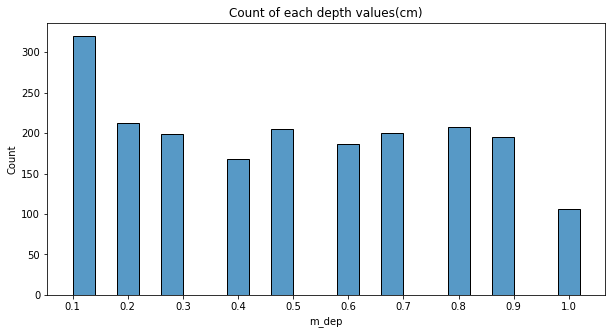

In [99]:
# Histplot to show count of each categories

plt.figure(figsize=(10,5))
xtick=sorted(list(df['m_dep'].unique()))
sns.histplot(df['m_dep'],binwidth=0.04)
plt.xticks(xtick)
plt.title('Count of each depth values(cm)')

**There is higher no. of observations for 0.1 depth and least observations for 1 cm depth.**

## **blue**

In [100]:
# Checking unique categories

df['blue'].unique()

array([0, 1])

In [101]:
# Value counts of each of categories.

df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

Text(0.5, 1.0, 'Count of phones for blue')

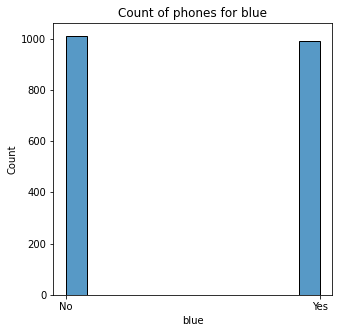

In [102]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['blue'])
plt.xticks(xtick, label)
plt.title('Count of phones for blue')

## **dual_sim**

In [103]:
# Checking unique categories

df['dual_sim'].unique()

array([0, 1])

In [104]:
# Value counts of each of categories.

df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

Text(0.5, 1.0, 'Count of phones for dual_sim')

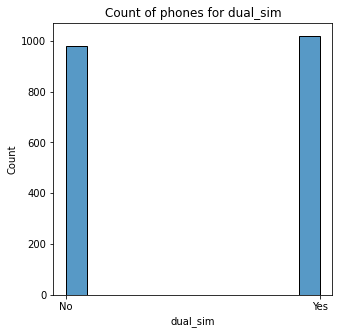

In [105]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['dual_sim'])
plt.xticks(xtick, label)
plt.title('Count of phones for dual_sim')

## **four_g**

In [106]:
# Checking unique categories

df['four_g'].unique()

array([0, 1])

In [107]:
# Value counts of each of categories.

df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

Text(0.5, 1.0, 'Count of phones for four_g')

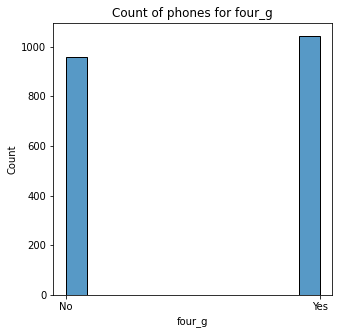

In [108]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['four_g'])
plt.xticks(xtick, label)
plt.title('Count of phones for four_g')

## **three_g**

In [109]:
# Checking unique categories

df['three_g'].unique()

array([0, 1])

In [110]:
# Value counts of each of categories.

df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

Text(0.5, 1.0, 'Count of phones for three_g')

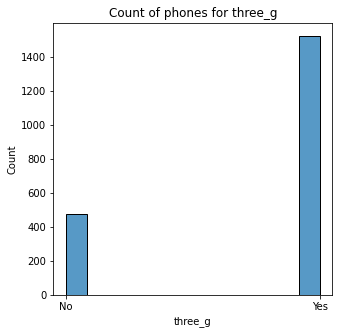

In [111]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['three_g'])
plt.xticks(xtick, label)
plt.title('Count of phones for three_g')

## **touch_screen**

In [112]:
# Checking unique categories

df['touch_screen'].unique()

array([0, 1])

In [113]:
# Value counts of each of categories.

df['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

Text(0.5, 1.0, 'Count of phones for touch_screen')

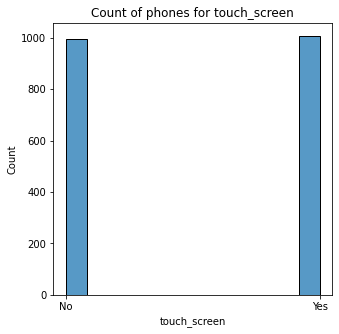

In [114]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['touch_screen'])
plt.xticks(xtick, label)
plt.title('Count of phones for touch_screen')

## **wifi**

In [115]:
# Checking unique categories

df['wifi'].unique()

array([1, 0])

In [116]:
# Value counts of each of categories.

df['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

Text(0.5, 1.0, 'Count of phones for wifi')

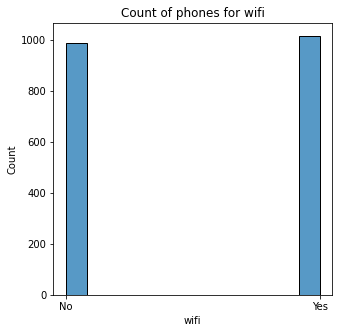

In [117]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['wifi'])
plt.xticks(xtick, label)
plt.title('Count of phones for wifi')

### **All these features have only two values i.e. '1' or '0'.**

### **Number of observation is almost equal for all these features except three_g.**

## **Correlation matrix**

Text(0.5, 1.0, 'Heatmap')

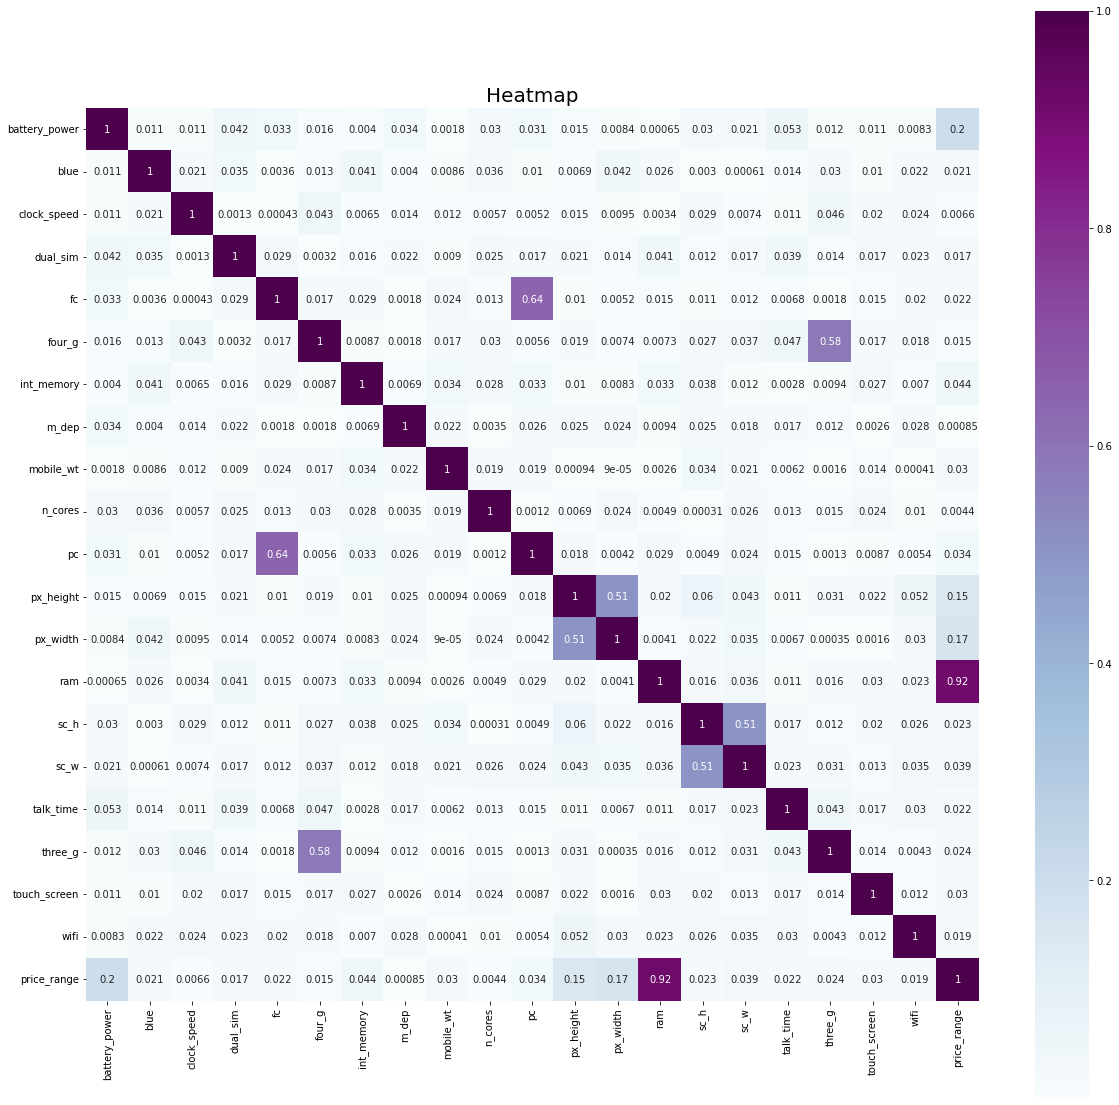

In [118]:
# Heatmap showing correlation between features

plt.figure(figsize=(20,20))
sns.heatmap(abs(df.corr()),annot=True, cmap='BuPu',square=True)
plt.title('Heatmap',fontsize=20)

* **From the above heatmap it is clear that ram is highly correlated with price_range.**
* **Also, battery_power is moderately correlated with price_range.**

## **Let's find influence of independent variables on our dependent variable**

### **Blue v/s price_range**

Text(0, 0.5, 'No. of phones')

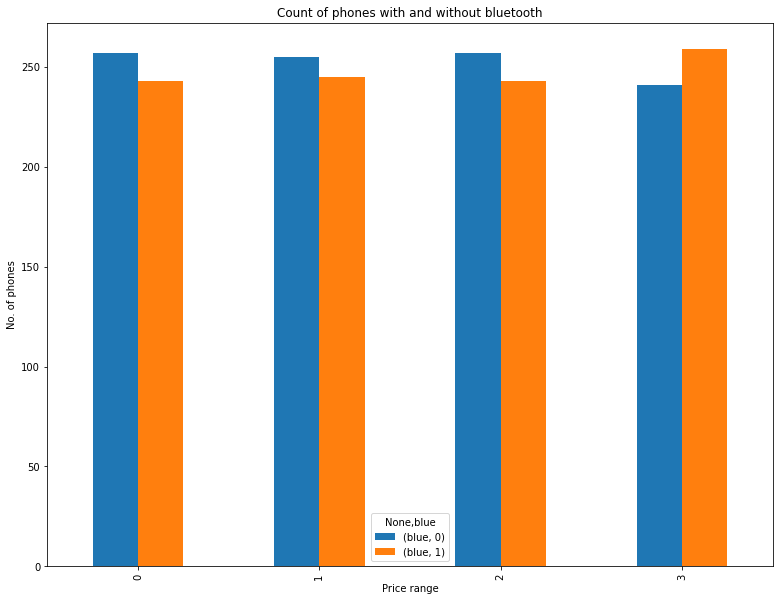

In [119]:
# Barplot showing price_range of phones with bluetooth or not.

plt.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'blue':'value_counts'}).unstack().plot.bar()
plt.title('Count of phones with and without bluetooth')
plt.xlabel('Price range')
plt.ylabel('No. of phones')

* **All price ranges have almost equal no. of observations for both with or without bluetooth.**

### **Dual_sim v/s price_range**

Text(0, 0.5, 'No. of phones')

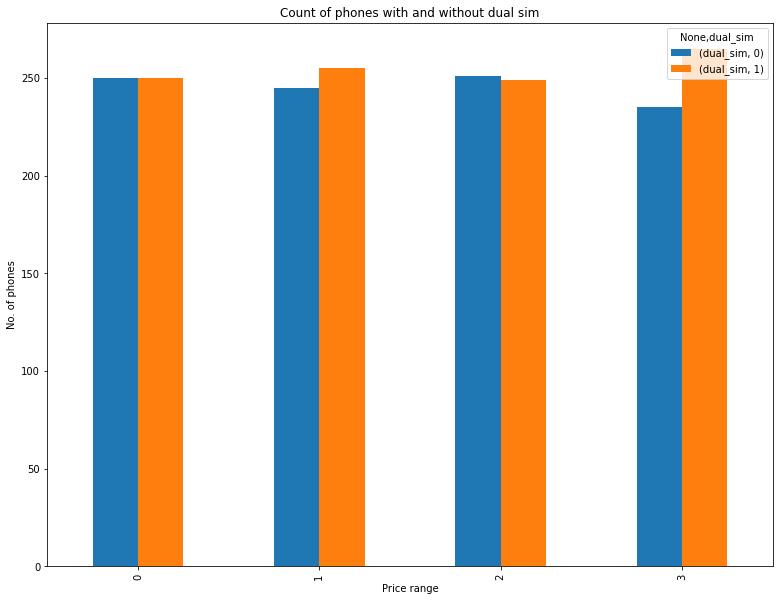

In [120]:
# Barplot showing price_range of phones with dual sim or not.

plt.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'dual_sim':'value_counts'}).unstack().plot.bar()
plt.title('Count of phones with and without dual sim')
plt.xlabel('Price range')
plt.ylabel('No. of phones')

* **All price ranges have almost equal no. of observations for both with or without dual sim.**
* **But for very high price range, dual sim should be supported.**

### **N_cores and m_depth v/s price range**

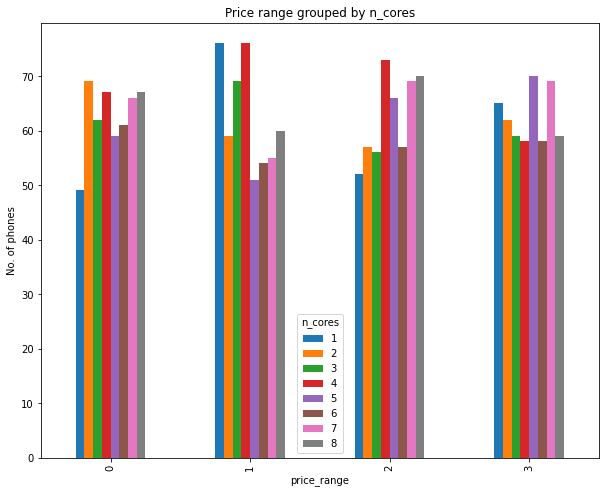

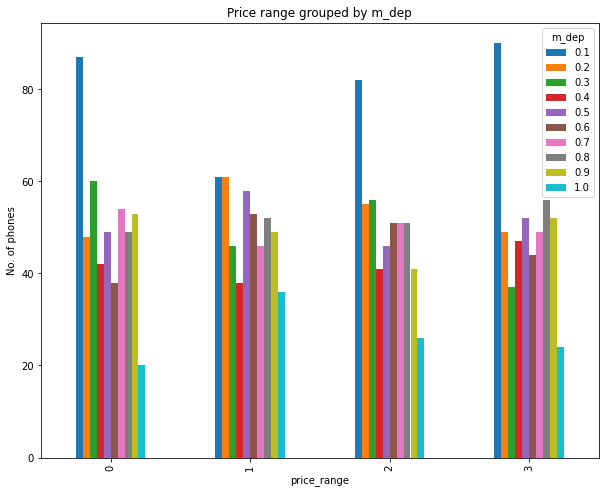

In [121]:
# grouping price range with n_cores and m_dep and visualizing 

list1=['n_cores','m_dep']
for item in list1:
  plt.rcParams['figure.figsize']=(10,8)
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

* **Count of less n_cores is high for 0 and 1 price range.**

* **Count of high n_cores is high for 2 and 3 price range.**

* **Count of phones with less thickness is high and count of phones with high thickness is low.**

### **Battery_power v/s price_range**

Text(0.5, 1.0, 'Battery power vs price range')

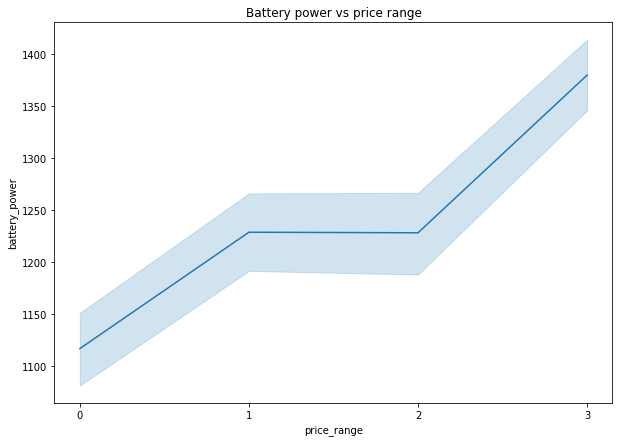

In [122]:
# Visualizing price range with battery power using lineplot

plt.figure(figsize=(10,7))
xtick=[0,1,2,3]
plt.xticks(xtick)
sns.lineplot(x='price_range',y='battery_power',data=df)
plt.title('Battery power vs price range')

* **Battery power increases as price range increases.**

### **Ram v/s price_range**

Text(0.5, 1.0, 'Ram vs price range')

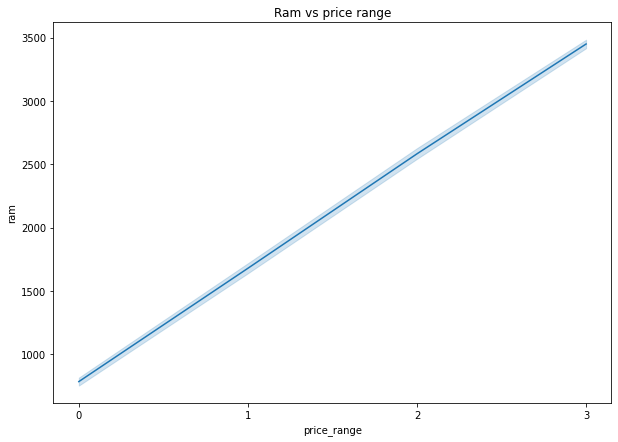

In [123]:
# Visualizing price range with ram using lineplot

plt.figure(figsize=(10,7))
xtick=[0,1,2,3]
plt.xticks(xtick)
sns.lineplot(x='price_range',y='ram',data=df)
plt.title('Ram vs price range')

* **Ram is having direct impact on price range.**
* **Higher ram is equal to higher prices.**

### **Battery_power, px_height, px_width, ram v/s price_range**

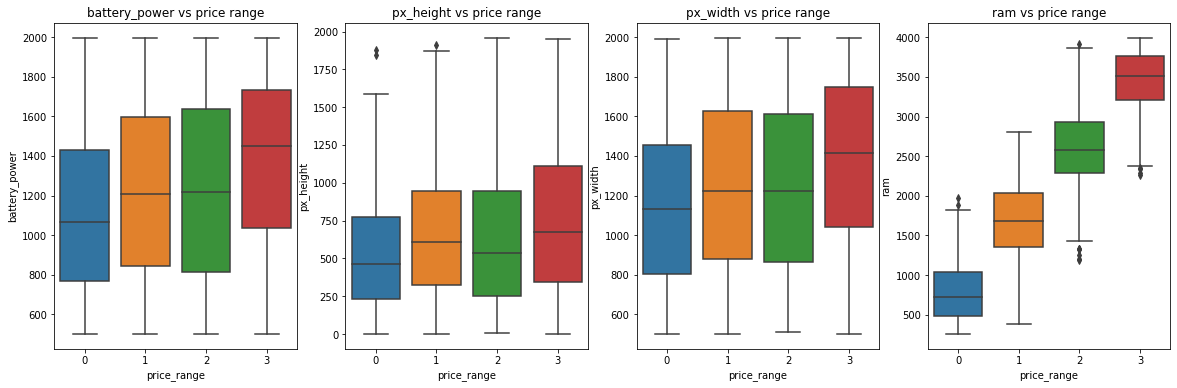

In [124]:
# Visualizing price range grouped by these variables using boxplot

list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.boxplot(x='price_range',y=item,data=df)
  plt.title(f'{item} vs price range')

* **Mean value of all these variables is increasing with increase in prices.**

### **int_memory v/s price_range**

Text(0.5, 1.0, 'int_memory vs price range')

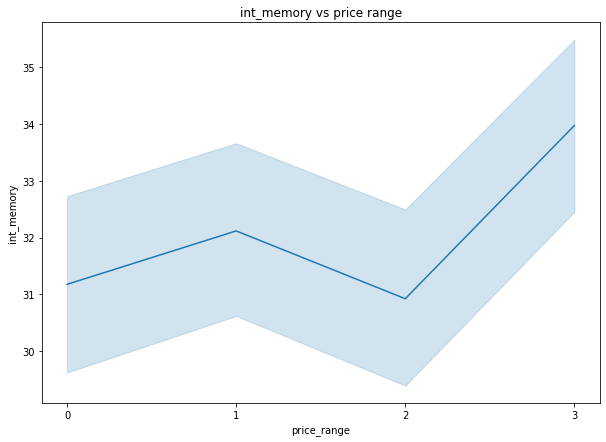

In [125]:
# Lineplot to show relation between internal memory and price range.

plt.figure(figsize=(10,7))
xtick=[0,1,2,3]
sns.lineplot(x='price_range',y='int_memory',data=df)
plt.xticks(xtick)
plt.title('int_memory vs price range')

* **From the above line plot it is clear that for very high prices there is drastic increase in internal memory.**

# **Data Wrangling**

## **Missing values**

**Let's check for Nan values.**

In [126]:
# Checking for Null values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* **Great! We dont have any missing values in our dataset.**

## **Outliers**

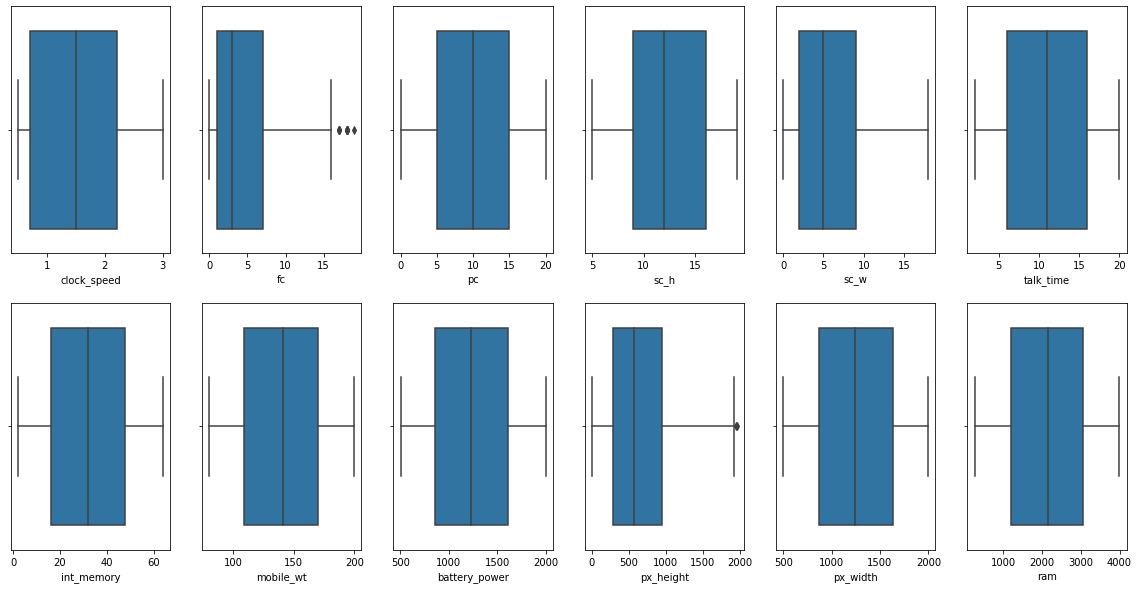

In [127]:
# Checking outliers for discrete and continous type variables using box plot

list1=['clock_speed','fc','pc','sc_h','sc_w','talk_time','int_memory','mobile_wt','battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,10))
for index,item in enumerate(list1):
  plt.subplot(2,6,index+1)
  sns.boxplot(df[item])

* **Great! It looks like we dont have any outliers except in fc which can be considered negligible as they are not that far away from the maximum value.**

## **Feature Engineering**

**In this section we will try to modify some columns and form new columns.**

In [128]:
# First make copy of dataset before making changes

df_copy=df.copy()

* **Earlier we saw in correlation heatmap that px_height and px_width were moderately correlated.**
* **Also, sc_h and sc_w were moderately correlated**

**Thus we can convert them into single column.**

In [129]:
# Creating new column px_area from px_height and px_weight

df_copy['px_area']=df_copy['px_height']*df_copy['px_width']

In [130]:
# Creating new column sc_area from sc_h and sc_w

df_copy['sc_area']=df_copy['sc_h']*df_copy['sc_w']

**Now, we can drop those earlier columns from our dataset.**

In [131]:
# Dropping columns

df_copy.drop(columns=['px_height','px_width','sc_h','sc_w',],inplace=True)

In [132]:
# Let's check first 5 rows of our modified dataset

df_copy.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,px_area,sc_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,15120,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,1799140,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,2167308,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,2171776,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,1464096,16


## **Splitting the data and Standardization**

In [133]:
# Importing library

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [134]:
# Extracting independent features

X=df_copy.drop(columns='price_range')

In [135]:
# Extracting dependent/target variable

y=df_copy['price_range']

In [136]:
# splitting the dataset
# random_state=0 to ensure same observations in each set everytime we run

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [137]:
# standardizing the independent variables

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# **Fitting models**

## **Random Forest Classifier**

In [138]:
# Importing library

from sklearn.ensemble import RandomForestClassifier

**Initial fitting**

In [139]:
# Creating instance of random forest and fitting data

rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [140]:
# predicting for both train and test

y_pred_train1=rf_model.predict(X_train)
y_pred_test1=rf_model.predict(X_test)

In [141]:
# Checking predicted values for test set

y_pred_test1

array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 2, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 1, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 1, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       2, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 1, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 1, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 0,

**Evaluation metrics**

In [142]:
# Importing libraries

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score

In [143]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train1))
print('The precision of training set = ',precision_score(y_train,y_pred_train1,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train1,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train1,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train1))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  1.0
The precision of training set =  [1. 1. 1. 1.]
The recall of training set =  [1. 1. 1. 1.]
The f1 score of training set =  [1. 1. 1. 1.]
The confusion matrix of training set = 
 [[405   0   0   0]
 [  0 408   0   0]
 [  0   0 401   0]
 [  0   0   0 386]]


In [144]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test1))
print('The precision of test set = ',precision_score(y_test,y_pred_test1,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test1,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test1,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test1))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.89
The precision of test set =  [0.91262136 0.78640777 0.85714286 1.        ]
The recall of test set =  [0.98947368 0.88043478 0.78787879 0.90350877]
The f1 score of test set =  [0.94949495 0.83076923 0.82105263 0.94930876]
The confusion matrix of test set = 
 [[ 94   1   0   0]
 [  9  81   2   0]
 [  0  21  78   0]
 [  0   0  11 103]]


In [145]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        95
           1       0.79      0.88      0.83        92
           2       0.86      0.79      0.82        99
           3       1.00      0.90      0.95       114

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



* **Accuracy score for train set is 1.0 and acuuracy score for test set is 0.89. So, this means there is overfitting in our model.**

**Let's store metric values of train and test set for later comparisons.**

In [146]:
# storing metric values in train df for later comparisons

dict1={'Model':'Random Forest - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train1),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
training_df=pd.DataFrame(dict1,index=[0])

In [147]:
# storing metric values in test df for later comparisons

dict2={'Model':'Random Forest - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test1),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
test_df=pd.DataFrame(dict2,index=[0])

### **We need to tune hyperparameters to prevent overfitting.**

**Cross-validation using RandomSearch**

In [148]:
# Importing RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [149]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(80,200,20,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(12,30,2,dtype='int64'))

# Minimum number of samples required to split a node
min_samples_split = list(np.arange(50,200,10,dtype='int64'))

# Minimum number of samples required at each leaf node
min_samples_leaf = list(np.arange(40,80,10,dtype='int64'))

# Max Features
max_features=['auto','log2']

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_features':max_features}

In [150]:
# Random search

rf_random = RandomizedSearchCV(estimator=rf_model,param_distributions = param_dict1,cv = 5,scoring='accuracy',n_jobs=-1,random_state=0)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [151]:
# Checking the best estimator

rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=130,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [152]:
# checking the best parameters

rf_random.best_params_

{'max_depth': 24,
 'max_features': 'auto',
 'min_samples_leaf': 40,
 'min_samples_split': 130,
 'n_estimators': 180}

In [153]:
# storing the best estimator in a variable

rf_optimal_model1=rf_random.best_estimator_

In [154]:
# predicting on both train and test

y_pred_train2=rf_optimal_model1.predict(X_train)
y_pred_test2=rf_optimal_model1.predict(X_test)

In [155]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train2))
print('The precision of training set = ',precision_score(y_train,y_pred_train2,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train2,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train2,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train2))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.859375
The precision of training set =  [0.88340807 0.77641278 0.83473389 0.94102564]
The recall of training set =  [0.97283951 0.7745098  0.74314214 0.9507772 ]
The f1 score of training set =  [0.92596945 0.77546012 0.78627968 0.94587629]
The confusion matrix of training set = 
 [[394  11   0   0]
 [ 52 316  40   0]
 [  0  80 298  23]
 [  0   0  19 367]]


In [156]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test2))
print('The precision of test set = ',precision_score(y_test,y_pred_test2,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test2,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test2,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test2))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.815
The precision of test set =  [0.86238532 0.66981132 0.76623377 0.94444444]
The recall of test set =  [0.98947368 0.77173913 0.5959596  0.89473684]
The f1 score of test set =  [0.92156863 0.71717172 0.67045455 0.91891892]
The confusion matrix of test set = 
 [[ 94   1   0   0]
 [ 15  71   6   0]
 [  0  34  59   6]
 [  0   0  12 102]]


In [157]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        95
           1       0.67      0.77      0.72        92
           2       0.77      0.60      0.67        99
           3       0.94      0.89      0.92       114

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



**After hyperparameter tuning:**

* **Accuracy score for train set is 0.86 and acuuracy score for test set is 0.81.**

**Let's store metric values of train and test set for later comparisons.**

In [158]:
# storing metric values in train df for later comparisons

dict1={'Model':'Random Forest - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train2),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Comments':'Reduced overfitting'}
training_df=training_df.append(dict1,ignore_index=True)

In [159]:
# storing metric values in train df for later comparisons

dict2={'Model':'Random Forest - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test2),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Comments':'Reduced overfitting'}
test_df=test_df.append(dict2,ignore_index=True)

###**Feature importance score w.r.t. RF model**

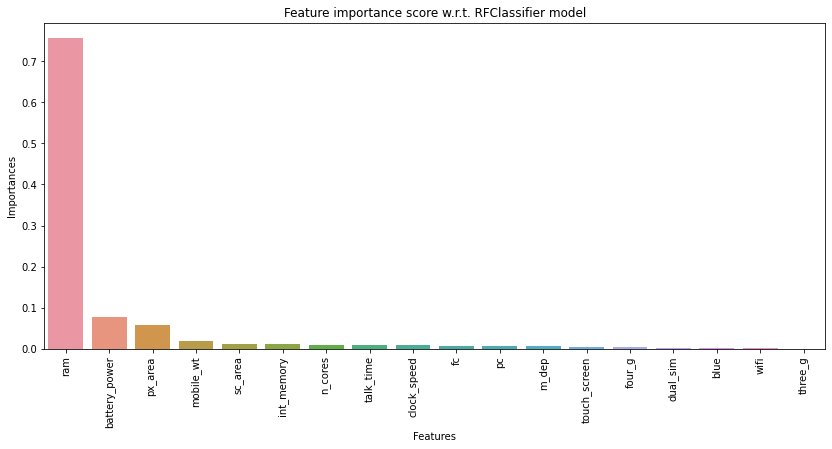

In [160]:
# Barplot showing important features w.r.t. RF model

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model1.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 6))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFClassifier model')
plt.show()

* **Ram is most important feature in Random Forest Classifier model.**
* **After ram, battery_power, px_area, mobile_wt, int_memory are the most important features as compared to other features.**

## **XGBoost Classifier**

In [161]:
# Importing library

from xgboost import XGBClassifier

**Initial fitting**

In [162]:
# Implementing XGBoost classifier

xgb_model=XGBClassifier(random_state=0,n_jobs=-1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [163]:
# Predicting for both training and test set

y_pred_train3=xgb_model.predict(X_train)
y_pred_test3=xgb_model.predict(X_test)

In [164]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train3))
print('The precision of training set = ',precision_score(y_train,y_pred_train3,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train3,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train3,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train3))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.97875
The precision of training set =  [0.995      0.95923261 0.97236181 0.98961039]
The recall of training set =  [0.98271605 0.98039216 0.96508728 0.98704663]
The f1 score of training set =  [0.98881988 0.96969697 0.96871089 0.98832685]
The confusion matrix of training set = 
 [[398   7   0   0]
 [  2 400   6   0]
 [  0  10 387   4]
 [  0   0   5 381]]


In [165]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test3))
print('The precision of test set = ',precision_score(y_test,y_pred_test3,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test3,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test3,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test3))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.8725
The precision of test set =  [0.94897959 0.78703704 0.77777778 0.98947368]
The recall of test set =  [0.97894737 0.92391304 0.77777778 0.8245614 ]
The f1 score of test set =  [0.96373057 0.85       0.77777778 0.89952153]
The confusion matrix of test set = 
 [[93  2  0  0]
 [ 5 85  2  0]
 [ 0 21 77  1]
 [ 0  0 20 94]]


In [166]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        95
           1       0.79      0.92      0.85        92
           2       0.78      0.78      0.78        99
           3       0.99      0.82      0.90       114

    accuracy                           0.87       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.88      0.87      0.87       400



* **Accuracy score for train set is 0.97 and acuuracy score for test set is 0.87. So, this means there is overfitting in our model.**

**Let's store metric values of train and test set for later comparisons.**

In [167]:
# storing metric values in train df for later comparisons

dict1={'Model':'XGBoost - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train3),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train3,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train3,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train3,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
training_df=training_df.append(dict1,ignore_index=True)

In [168]:
# storing metric values in test df for later comparisons

dict2={'Model':'XGBoost - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test3),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test3,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test3,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test3,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
test_df=test_df.append(dict2,ignore_index=True)

### **We need to tune hyperparameters to prevent overfitting.**

**Cross-validation using RandomSearch**

In [169]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(5,15,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(10,20,1,dtype='int64'))

# learning rate
learning_rate=list(np.arange(0.05,0.15,0.01))

# min childs weight
min_child_weight=list(np.linspace(10,20,num=1,dtype='int64'))

# gamma
gamma=list(np.linspace(0,2,num=20,dtype='int64'))

# subsamples
subsample=[0.3,0.5,0.6] 

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [170]:
# Random search

xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,scoring='accuracy',n_jobs=-1,random_state=0)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'learning_rate': [0.05,
                                                          0.060000000000000005,
                                 

In [171]:
# checking th ebest estimator

xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.13, max_delta_step=0, max_depth=13,
              min_child_weight=10, missing=None, n_estimators=13, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [172]:
# checking the best parameters

xgb_random.best_params_

{'gamma': 1,
 'learning_rate': 0.13,
 'max_depth': 13,
 'min_child_weight': 10,
 'n_estimators': 13,
 'subsample': 0.5}

In [173]:
# storing the best estimator in a variable

xgb_optimal_model1=xgb_random.best_estimator_

In [174]:
# predicting on both train and test

y_pred_train4=xgb_optimal_model1.predict(X_train)
y_pred_test4=xgb_optimal_model1.predict(X_test)

In [175]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',round(accuracy_score(y_train,y_pred_train4),2))
print('The precision of training set = ',precision_score(y_train,y_pred_train4,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train4,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train4,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train4))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.89
The precision of training set =  [0.9192399  0.86040609 0.83497537 0.93403694]
The recall of training set =  [0.95555556 0.83088235 0.84538653 0.91709845]
The f1 score of training set =  [0.937046   0.84538653 0.8401487  0.9254902 ]
The confusion matrix of training set = 
 [[387  18   0   0]
 [ 34 339  35   0]
 [  0  37 339  25]
 [  0   0  32 354]]


In [176]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',round(accuracy_score(y_test,y_pred_test4),2))
print('The precision of test set = ',precision_score(y_test,y_pred_test4,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test4,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test4,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test4))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.85
The precision of test set =  [0.89320388 0.78       0.77659574 0.93203883]
The recall of test set =  [0.96842105 0.84782609 0.73737374 0.84210526]
The f1 score of test set =  [0.92929293 0.8125     0.75647668 0.88479263]
The confusion matrix of test set = 
 [[92  3  0  0]
 [11 78  3  0]
 [ 0 19 73  7]
 [ 0  0 18 96]]


In [177]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.78      0.85      0.81        92
           2       0.78      0.74      0.76        99
           3       0.93      0.84      0.88       114

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



**After hyperparameter tuning:**

* **Accuracy score for train set is 0.89 and acuuracy score for test set is 0.85.**

**Great! This can be considered as best model.**

**Let's store metric values of train and test set for later comparisons.**

In [178]:
# storing metric values in train df for later comparisons

dict1={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train4),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train4,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train4,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train4,average=None),decimals=2))],
       'Comments':'Best of all model'}
training_df=training_df.append(dict1,ignore_index=True)

In [179]:
# storing metric values in test df for later comparisons

dict2={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test4),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test4,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test4,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test4,average=None),decimals=2))],
       'Comments':'Best of all model'}
test_df=test_df.append(dict2,ignore_index=True)

###**Feature importance score w.r.t. XGBoost model**

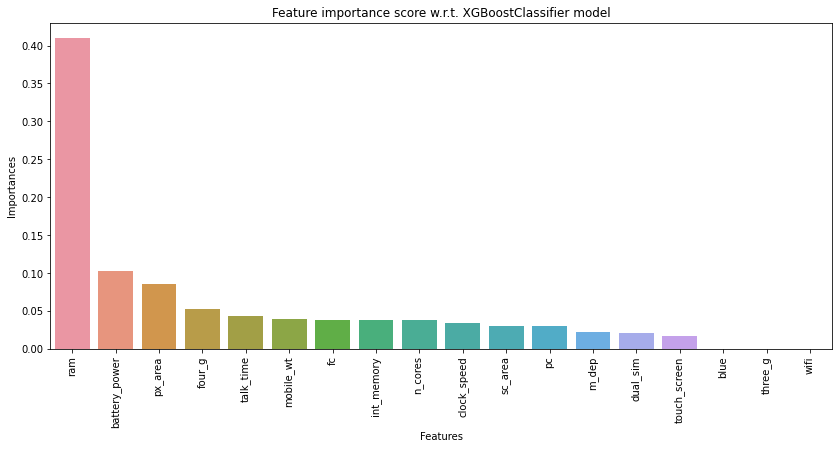

In [180]:
# Barplot showing important features w.r.t. RF model

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model1.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 6))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBoostClassifier model')
plt.show()

* **Ram is most important feature in XGBoost Classifier model.**
* **After ram, battery_power, px_area, four_g, mobile_wt, int_memory are the most important features as compared to other features.**

### **Let's check training and test set values.**

In [181]:
# checking the training set values

training_df

,Model,Accuracy,Precision,Recall,F1_score,Comments
0,Random Forest - Before hyperparameter tuning,1.00,"[1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0]",Possible overfitting
1,Random Forest - After hyperparameter tuning,0.86,"[[0.88, 0.78, 0.83, 0.94]]","[[0.97, 0.77, 0.74, 0.95]]","[[0.93, 0.78, 0.79, 0.95]]",Reduced overfitting
2,XGBoost - Before hyperparameter tuning,0.98,"[[1.0, 0.96, 0.97, 0.99]]","[[0.98, 0.98, 0.97, 0.99]]","[[0.99, 0.97, 0.97, 0.99]]",Possible overfitting
3,XGBoost - After hyperparameter tuning,0.89,"[[0.92, 0.86, 0.83, 0.93]]","[[0.96, 0.83, 0.85, 0.92]]","[[0.94, 0.85, 0.84, 0.93]]",Best of all model


In [182]:
# checking the test set values

test_df

,Model,Accuracy,Precision,Recall,F1_score,Comments
0,Random Forest - Before hyperparameter tuning,0.89,"[0.91, 0.79, 0.86, 1.0]","[0.99, 0.88, 0.79, 0.9]","[0.95, 0.83, 0.82, 0.95]",Possible overfitting
1,Random Forest - After hyperparameter tuning,0.82,"[[0.86, 0.67, 0.77, 0.94]]","[[0.99, 0.77, 0.6, 0.89]]","[[0.92, 0.72, 0.67, 0.92]]",Reduced overfitting
2,XGBoost - Before hyperparameter tuning,0.87,"[[0.95, 0.79, 0.78, 0.99]]","[[0.98, 0.92, 0.78, 0.82]]","[[0.96, 0.85, 0.78, 0.9]]",Possible overfitting
3,XGBoost - After hyperparameter tuning,0.85,"[[0.89, 0.78, 0.78, 0.93]]","[[0.97, 0.85, 0.74, 0.84]]","[[0.93, 0.81, 0.76, 0.88]]",Best of all model


# **Conclusion**

* **The accuracy of our best model was 0.89 and 0.85 for training and test set respectively.**

* **With default hyperparameters, our both models got overfitted.**

* **Ram was most important feature in determining the predictions.**

* **Also, battery_power, px_height and px_weight were the major contributions in determining the predictions.**

* **Higher the values of these features led to higher predicted values.**

* **Performance can be improved even further by applying fine tunings so that the models can identify more patterns and become less prone to overfitting.**